In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob, Word
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('new_export_dataframe_.csv')
df.head()

,level_0,index,0,1,2,Client_split
0,0,0,Client:,<em>(pulling out Page 3 of The Sun newspaper)<...,Sexist,em pulling out page of the sun newspaper ...
1,1,1,Client:,Are you some sort of faggot?,Sexist,are you some sort of faggot
2,2,2,Client,: I’d like you to update the site again. As pa...,Sexist,i d like you to update the site again as pa...
3,3,0,Client:,Every time I turn a page of the book I’m trans...,Sexist,every time i turn a page of the book i m trans...
4,4,1,Me:,"Alright, since your editors aren’t really tec...",Sexist,alright since your editors aren t really tec...


In [3]:
df['2'].unique()

array(['Sexist', 'Cryptic', 'Homophobes', 'Ingrates', 'Frenemies',
       'Racists', 'Criminals', 'Chaotic Good', 'Dunces', 'Deadbeats'],
      dtype=object)

In [4]:
df['Deadbeats'] = np.where((df['2'] == 'Deadbeats'), 1, 0)

In [5]:
df.head()

,level_0,index,0,1,2,Client_split,Deadbeats
0,0,0,Client:,<em>(pulling out Page 3 of The Sun newspaper)<...,Sexist,em pulling out page of the sun newspaper ...,0
1,1,1,Client:,Are you some sort of faggot?,Sexist,are you some sort of faggot,0
2,2,2,Client,: I’d like you to update the site again. As pa...,Sexist,i d like you to update the site again as pa...,0
3,3,0,Client:,Every time I turn a page of the book I’m trans...,Sexist,every time i turn a page of the book i m trans...,0
4,4,1,Me:,"Alright, since your editors aren’t really tec...",Sexist,alright since your editors aren t really tec...,0


In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
en_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josematos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
word_count_vectors = tfidf.fit_transform(
    df['Client_split'].apply(
        lambda x: ' '.join([w for w in x.lower().split() if w not in en_stopwords])
    ).values
).todense().tolist()

In [8]:
df_words = pd.DataFrame(
    data = word_count_vectors,
    columns = tfidf.get_feature_names()
)
df_words.head()

,abandoned,ability,able,absolute,absolutely,accents,accept,acceptable,accepted,accepts,...,yet,young,youre,youtube,youve,yr,yyyy,zip,zone,zoomed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df[['0','2', 'Deadbeats']].head()

,0,2,Deadbeats
0,Client:,Sexist,0
1,Client:,Sexist,0
2,Client,Sexist,0
3,Client:,Sexist,0
4,Me:,Sexist,0


In [10]:
result = pd.concat([df[['0','2', 'Deadbeats']], df_words], axis=1, sort=False)
result.head()

,0,2,Deadbeats,abandoned,ability,able,absolute,absolutely,accents,accept,...,yet,young,youre,youtube,youve,yr,yyyy,zip,zone,zoomed
0,Client:,Sexist,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Client:,Sexist,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Client,Sexist,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Client:,Sexist,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Me:,Sexist,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

regressors = {'Logistic Regression': LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr'),
              'Gaussian NB': GaussianNB(),
              'Bernoulli NB': BernoulliNB(),
              'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0),
              'KNeighborsClassifier': KNeighborsClassifier(), 
              'SVM': svm.LinearSVC(),
              'Neural Network':  MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)}

def compare_models(x, y, model_dict, folds=3):
    results = []
    for name, model in model_dict.items():
        scores = cross_val_score(model, x, y, cv=folds)
        stats = [name, scores.mean(), min(scores), max(scores), scores.std(), pd.Series(scores).mad()]
        results.append(stats)
    df = pd.DataFrame(results, columns = ['Model', 'Mean', 'Min', 'Max','Std', 'Mad'])
    df = df.sort_values('Mean', ascending = False)
    return df

## With Client and Me

### Balancin DataSet: `Down-sample Mayority Class`

In [12]:
result['Deadbeats'].value_counts()

0    3342
1     871
Name: Deadbeats, dtype: int64

In [13]:
from sklearn.utils import resample

In [14]:
# Separate majority and minority classes
df_majority = result[result['Deadbeats'] == 0]
df_minority = result[result['Deadbeats'] == 1]
 
# Downsample mayority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=871,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine minority class with downsampled mayority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled['Deadbeats'].value_counts()

1    871
0    871
Name: Deadbeats, dtype: int64

In [15]:
X = df_downsampled.drop(columns = ['Deadbeats','0','2'])
y = df_downsampled['Deadbeats']

## Pipeline

In [16]:
compare_models(X, y, regressors, 20)

,Model,Mean,Min,Max,Std,Mad
2,Bernoulli NB,0.656527,0.545455,0.750000,0.058773,0.051023
0,Logistic Regression,0.654625,0.568182,0.784091,0.060997,0.048861
5,SVM,0.647291,0.546512,0.772727,0.065936,0.056012
6,Neural Network,0.641015,0.523256,0.772727,0.064657,0.052199
3,Random Forest,0.623362,0.556818,0.727273,0.039645,0.030206
4,KNeighborsClassifier,0.622555,0.523256,0.795455,0.068717,0.050330
1,Gaussian NB,0.582505,0.476744,0.738636,0.058255,0.045148


Bernoulli NB is only possible when the features are binary; which is not the case for this reason we are going to use Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Logistic Regression

In [18]:
lr = LogisticRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6743119266055045

In [19]:
from sklearn.metrics import confusion_matrix

y_pred_test = lr.predict(X_test)
confusion_matrix(y_test, y_pred_test)

array([[165,  54],
       [ 88, 129]])

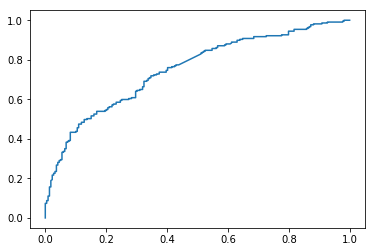

In [20]:
from sklearn import metrics

y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr)

In [21]:
auc

0.7502051638154157

## With Client Only

In [22]:
client = result[result['0'].str.contains('Client' )]
client.head()

,0,2,Deadbeats,abandoned,ability,able,absolute,absolutely,accents,accept,...,yet,young,youre,youtube,youve,yr,yyyy,zip,zone,zoomed
0,Client:,Sexist,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Client:,Sexist,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Client,Sexist,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Client:,Sexist,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Client:,Sexist,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
client = client.replace(0, np.nan).dropna(axis = 1, how = 'all').fillna(0)

In [24]:
client.head()

,0,2,Deadbeats,ability,able,absolute,absolutely,accept,acceptable,accepts,...,yep,yes,yesterday,yet,young,youre,youtube,youve,yyyy,zip
0,Client:,Sexist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Client:,Sexist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Client,Sexist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Client:,Sexist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Client:,Sexist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
client['Deadbeats'].value_counts()

0.0    1852
1.0     487
Name: Deadbeats, dtype: int64

### Balancin DataSet: `Down-sample Mayority Class`

In [26]:
# Separate majority and minority classes
df_majority = client[client['Deadbeats'] == 0]
df_minority = client[client['Deadbeats'] == 1]
 
# Downsample mayority class
df_majority_downsampled_client = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=487,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine minority class with downsampled mayority class
df_downsampled_client = pd.concat([df_majority_downsampled_client, df_minority])
 
# Display new class counts
df_downsampled_client['Deadbeats'].value_counts()

1.0    487
0.0    487
Name: Deadbeats, dtype: int64

In [27]:
X_client = df_downsampled_client.drop(columns = ['Deadbeats','0','2'])
y_client = df_downsampled_client['Deadbeats']

In [28]:
compare_models(X_client, y_client, regressors, 20)

,Model,Mean,Min,Max,Std,Mad
5,SVM,0.661875,0.520833,0.791667,0.063508,0.052438
0,Logistic Regression,0.658667,0.541667,0.791667,0.061479,0.051417
2,Bernoulli NB,0.647250,0.500000,0.812500,0.081264,0.065175
3,Random Forest,0.623750,0.500000,0.729167,0.075060,0.066333
4,KNeighborsClassifier,0.612625,0.416667,0.820000,0.104418,0.086100
1,Gaussian NB,0.596208,0.416667,0.720000,0.080233,0.065513
6,Neural Network,0.500000,0.500000,0.500000,0.000000,0.000000


In [29]:
X_train_client, X_test_client, y_train_client, y_test_client = train_test_split(X_client, y_client, test_size=0.25)

In [31]:
lsvc = svm.LinearSVC().fit(X_train_client, y_train_client)
lsvc.score(X_test_client, y_test_client)

0.6557377049180327

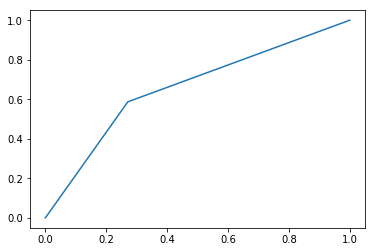

In [34]:
y_pred_proba_client = lsvc.predict(X_test_client)
fpr, tpr, _ = metrics.roc_curve(y_test_client,  y_pred_proba_client)
auc = metrics.roc_auc_score(y_pred_proba_client, y_pred_proba_client)

plt.plot(fpr,tpr)

1.0